In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [2]:
random_state("rng_states/experiment1.npy")

In [3]:
S = [2, 5, 7, 3, 2, 5]
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 6

rectangles = [((2, 4), (16, 7))]
rectangle_vs = [(-2.3, 0.)]
targets = [(0., 9.)] * T
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 200
alpha_inf = 0.7
n_immigrants = 140
eta_c = 3.
eta_m = 15.
p_c = 0.8
p_m = 0.05
num_iterations_init = 60
num_iterations = 100

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 107, best: [0.33407577], #infeasible: 93, best: [0.82180606 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 60, best: [0.00642025], #infeasible: 140, best: [6.71144908e-04 1.00000000e+00]
Iteration 40, #feasible: 60, best: [0.00631845], #infeasible: 140, best: [1.66045363e-07 1.00000000e+00]
Iteration 59, #feasible: 60, best: [0.00631844], #infeasible: 140, best: [1.66045363e-07 1.00000000e+00]
t=1
Iteration 0, #feasible: 60, best: [0.23722446], #infeasible: 140, best: [1.66045363e-07 1.00000000e+00]
Iteration 20, #feasible: 60, best: [0.01039307], #infeasible: 140, best: [4.47652588e-08 1.00000000e+00]
Iteration 40, #feasible: 60, best: [0.00010787], #infeasible: 140, best: [2.67764534e-08 1.00000000e+00]
Iteration 60, #feasible: 60, best: [0.00010787], #infeasible: 140, best: [7.11608352e-10 1.00000000e+00]
Iteration 80, #feasible: 60, best: [0.00010787], #infeasible: 140, best: [1.25208511e-11 1.00000000e+00]
Iteration 99, #feasible: 60, best: [0.00010787], #infeasible: 140, best: [2.65041771e-14 1.00000000e+00]
t=2
Iteration 0, #feasible: 60, best: [7.49141262], 

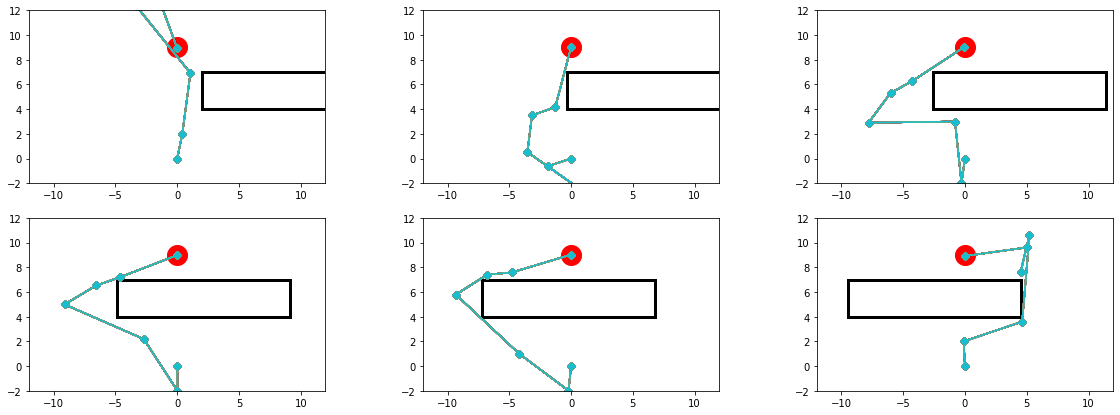

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)

draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=2, ncols=3, figsize=(20, 7), xlim=(-12, 12), ylim=(-2, 12))

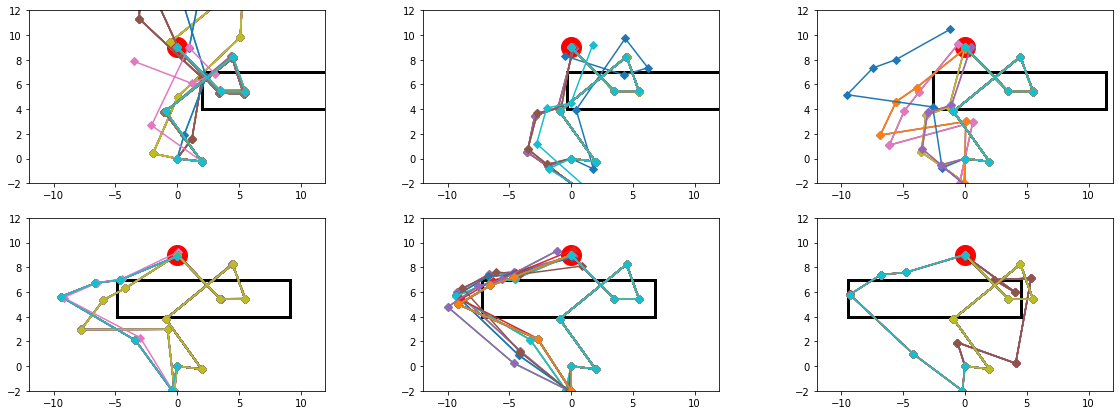

In [5]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)

draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=2, ncols=3, figsize=(20, 7), xlim=(-12, 12), ylim=(-2, 12))